In [190]:
import math
import numpy as np
import pandas
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
%matplotlib inline

In [191]:
sizes = [8,10,12,16,20,24]
data = []
for i in sizes:
    data.append(pandas.read_csv('L_{}_Grupo_1.dat'.format(i), sep=' ', na_values="."))

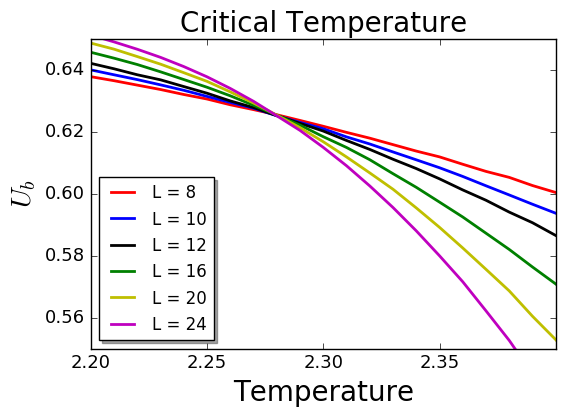

In [192]:
#plt.axes(xlim=(0, total_t),ylim=(-delta_mean_n[-1]*3, delta_mean_n[-1]*3))
colors = ['r','b','k','g','y','m']

plt.axis([2.2, 2.4, 0.55, 0.65])

for i in range(len(sizes)):
    plt.ylabel('$U_b$',fontsize=20)
    plt.xlabel('Temperature',fontsize=20)
    plt.tick_params(axis='x', labelsize=13)
    plt.tick_params(axis='y', labelsize=13)
    plt.title("Critical Temperature",fontsize=20)
    plt.plot(data[i]["T"],data[i]["Ub"], color=colors[i], linewidth=2.0,label="L = {}".format(sizes[i])) # if mean is conserved the plot should be zero
    plt.legend(loc='lower left', shadow=True)
plt.show()

In [193]:
intersection_t = np.isclose(data[0]["Ub"], data[1]["Ub"], atol=0.0004)

intersection = []
for index,truth in enumerate(intersection_t):
    if truth :
        intersection.append(index)
        intersection.append(data[0]["T"][index])

In [194]:
print (intersection)

[8, 2.2799999999999998]


In [195]:
dev_T_c = []

for i in range(len(sizes)):
    dev_T_c.append(-(np.diff(data[i]["Ub"])/np.diff(data[i]["T"]))[intersection[0]])


In [196]:
def func(x, a, b):
    return a*x**b
popt, pcov =curve_fit(func, sizes, dev_T_c)
nu = 1./ popt[1]
print (popt)
print (nu)

[ 0.02731487  0.89636844]
1.11561267854


In [197]:
L = np.arange(6, 30, 0.1)
fun = popt[0]*L**popt[1]

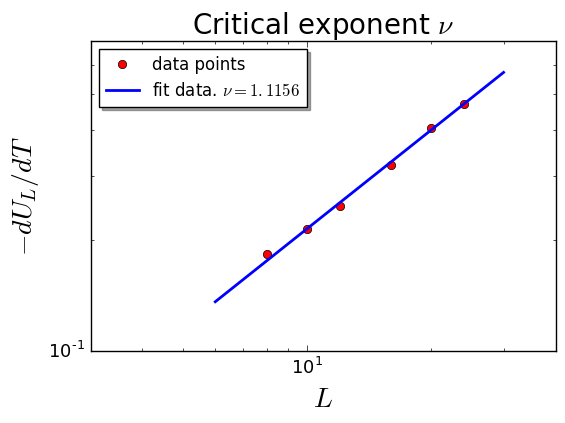

In [198]:
#plt.axes(xlim=(0.1, 0.55),ylim=(6, 26))
plt.axis([3, 40, 0.1, 0.7])
plt.ylabel(r'$ -dU_L/dT $',fontsize=20)
plt.xlabel(r'$L$',fontsize=20)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.title(r"Critical exponent $\nu$",fontsize=20)
plt.loglog(sizes,dev_T_c,'ro',linewidth=2.0,label = "data points")
plt.loglog(L,fun,'b',linewidth=2.0,label = "fit data. " r'$\nu=1.1156$')
plt.legend(loc='upper left', shadow=True,numpoints=1)

plt.show()

In [199]:
M_prom = []
for i in range(len(sizes)):
    M_prom.append(data[i]["Mprom"][intersection[0]]/(sizes[i]*sizes[i]))
print (M_prom)

[0.80604843749999999, 0.78354900000000005, 0.76631944444444444, 0.73946875000000001, 0.71836250000000001, 0.7008402777777778]


In [200]:
popt1, pcov1 =curve_fit(func, sizes, M_prom)
frac_b_nu = popt1[1]
beta = - frac_b_nu*nu
print (popt1)
print (beta)

[ 1.04891147 -0.12649292]
0.141117104546


In [201]:
L = np.arange(6, 30, 0.1)
fun1 = popt1[0]*L**popt1[1]

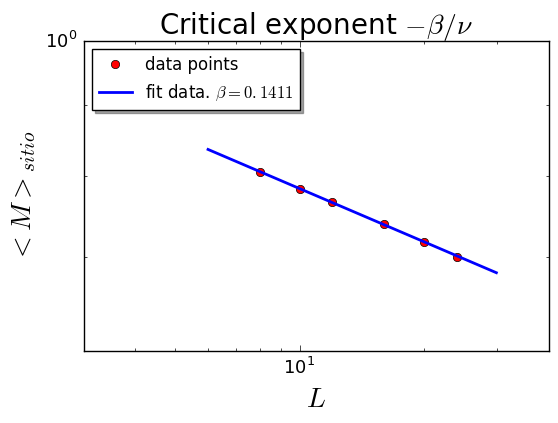

In [202]:
#plt.axes(xlim=(0.1, 0.55),ylim=(6, 26))
plt.axis([3, 40, 0.6, 1])
plt.ylabel(r'$ <M>_{sitio} $',fontsize=20)
plt.xlabel(r'$L$',fontsize=20)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.title(r"Critical exponent $- \beta / \nu$",fontsize=20)
plt.loglog(sizes,M_prom ,'ro',linewidth=2.0,label = "data points")
plt.loglog(L,fun1,'b',linewidth=2.0,label = "fit data. " r'$\beta=0.1411$')
plt.legend(loc='upper left', shadow=True,numpoints=1)

plt.show()

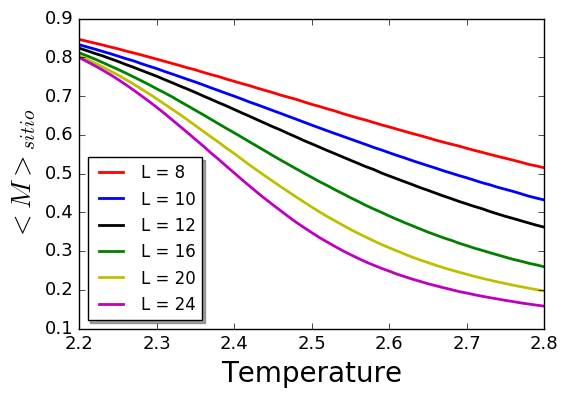

In [203]:
colors = ['r','b','k','g','y','m']

for i in range(len(sizes)):
    plt.ylabel(r'$ <M>_{sitio} $',fontsize=20)
    plt.xlabel('Temperature',fontsize=20)
    plt.tick_params(axis='x', labelsize=13)
    plt.tick_params(axis='y', labelsize=13)
    #plt.title("Critical Temperature",fontsize=20)
    plt.plot(data[i]["T"],data[i]["Mprom"]/(sizes[i]*sizes[i]), color=colors[i], linewidth=2.0,label="L = {}".format(sizes[i])) # if mean is conserved the plot should be zero
    plt.legend(loc='lower left', shadow=True)
plt.show()

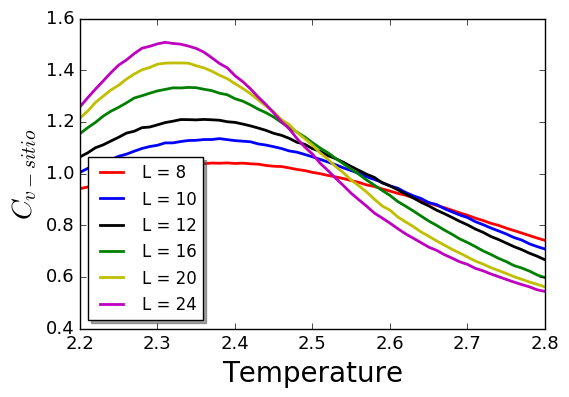

In [204]:
colors = ['r','b','k','g','y','m']

for i in range(len(sizes)):
    plt.ylabel(r'$ C_{v-sitio} $',fontsize=20)
    plt.xlabel('Temperature',fontsize=20)
    plt.tick_params(axis='x', labelsize=13)
    plt.tick_params(axis='y', labelsize=13)
    #plt.title("Critical Temperature",fontsize=20)
    plt.plot(data[i]["T"],data[i]["Cv"]/(sizes[i]*sizes[i]), color=colors[i], linewidth=2.0,label="L = {}".format(sizes[i])) # if mean is conserved the plot should be zero
    plt.legend(loc='lower left', shadow=True)
plt.show()

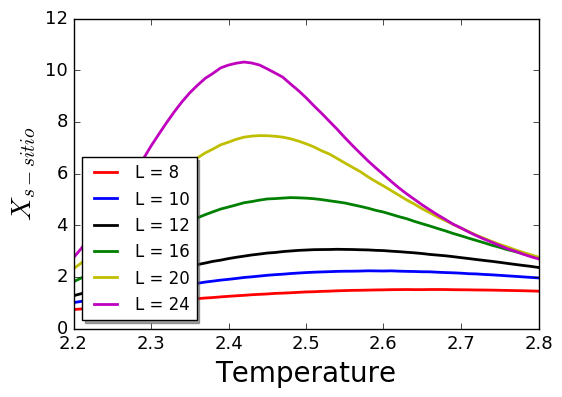

In [205]:
colors = ['r','b','k','g','y','m']

for i in range(len(sizes)):
    plt.ylabel(r'$ X_{s-sitio} $',fontsize=20)
    plt.xlabel('Temperature',fontsize=20)
    plt.tick_params(axis='x', labelsize=13)
    plt.tick_params(axis='y', labelsize=13)
    #plt.title("Critical Temperature",fontsize=20)
    plt.plot(data[i]["T"],data[i]["Xs"]/(sizes[i]*sizes[i]), color=colors[i], linewidth=2.0,label="L = {}".format(sizes[i])) # if mean is conserved the plot should be zero
    plt.legend(loc='lower left', shadow=True)
    
plt.show()

In [206]:
# revision de maximos
maximums_cvT = []
for i in range(len(sizes)):
    maxi = 0
    index = 0
    for ind,item in enumerate(data[i]["Cv"]):
        if item>maxi :
            maxi = item
            index = ind
    maximums_cvT.append(data[i]["T"][index])

maximums_xsT = []
for i in range(len(sizes)):
    maxi = 0
    index = 0
    for ind,item in enumerate(data[i]["Xs"]):
        if item>maxi :
            maxi = item
            index = ind
    maximums_xsT.append(data[i]["T"][index])
print (maximums_cvT)
print (maximums_xsT)

[2.3900000000000001, 2.3799999999999999, 2.3599999999999999, 2.3399999999999999, 2.3199999999999998, 2.3100000000000001]
[2.6699999999999999, 2.5800000000000001, 2.54, 2.48, 2.4399999999999999, 2.4199999999999999]


In [207]:
# calcular máximos
for i in range(len(sizes)):
    max_y = max(data[i]["Cv"])  # Find the maximum y value
    #max_y = max(data[i]["Xs"])  # Find the maximum y value
    print (max_y)
TmaxCv=[2.39,2.38,2.36,2.34,2.32,2.31]
#TmaxXs=[2.67,2.58,2.54,2.48,2.44,2.42]

66.6262
113.502
174.143
341.298
571.175
868.432


In [208]:
def funci(x, a, b):
    return a*x+b
popt4, pcov4 =curve_fit(funci, pow(sizes,-1/nu), TmaxCv)
popt5, pcov5 =curve_fit(funci, pow(sizes,-1/nu), TmaxXs)

L = np.arange(0, 0.16, 0.01)
fun1 = popt4[0]*L+popt4[1]
fun2 = popt5[0]*L+popt5[1]
print ( popt4[0]*0+popt4[1])
print ( popt5[0]*0+popt5[1])

2.26444500551
2.26828515388


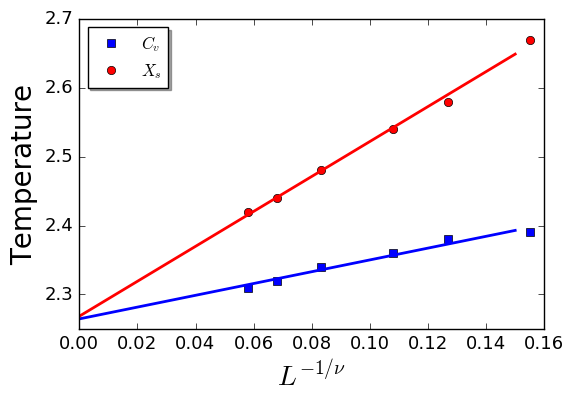

In [209]:

plt.ylabel('Temperature',fontsize=20)
plt.xlabel(r'$L^{-1/\nu}$',fontsize=20)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
#plt.title("Critical Temperature",fontsize=20)
plt.plot(pow(sizes,-1/nu),TmaxCv ,'bs',linewidth=2.0,label = r'$ {C_{v}} $')
plt.plot(pow(sizes,-1/nu),TmaxXs ,'ro',linewidth=2.0,label = r'$ {X_{s}} $')
plt.plot(L,fun1 ,'b',linewidth=2.0)#,label = r'$ T_{C_{v}} $')
plt.plot(L,fun2 ,'r',linewidth=2.0)#,label = r'$ T_{X_{s}} $')
plt.legend(loc='upper left', shadow=True,numpoints=1)
plt.show()


In [210]:
data2 = []
for i in sizes:
    data2.append(pandas.read_csv('L_{}_Grupo_2.dat'.format(i), sep=' ', na_values="."))

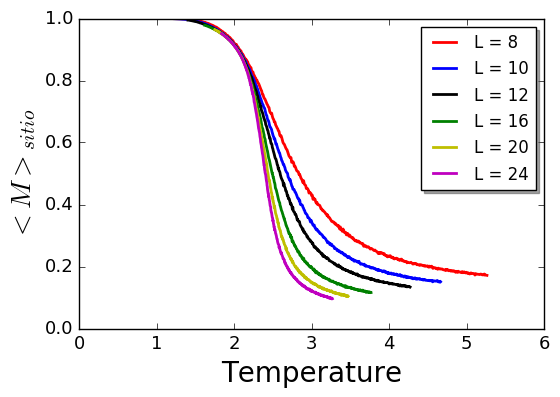

In [211]:
for i in range(len(sizes)):
    plt.ylabel(r'$ <M>_{sitio} $',fontsize=20)
    plt.xlabel('Temperature',fontsize=20)
    plt.tick_params(axis='x', labelsize=13)
    plt.tick_params(axis='y', labelsize=13)
    #plt.title("Critical Temperature",fontsize=20)
    plt.plot(data2[i]["T"],data2[i]["Mprom"]/(sizes[i]*sizes[i]), color=colors[i], linewidth=2.0,label="L = {}".format(sizes[i]))
    plt.legend(loc='upper right', shadow=True)
plt.show()


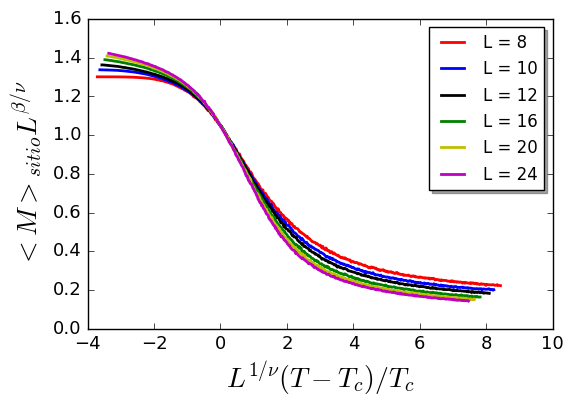

In [212]:
for i in range(len(sizes)):
    plt.ylabel(r'$ <M>_{sitio} L^{\beta / \nu}$',fontsize=20)
    plt.xlabel(r'$L^{1/\nu}(T-T_c)/T_c$',fontsize=20)
    plt.tick_params(axis='x', labelsize=13)
    plt.tick_params(axis='y', labelsize=13)
    #plt.title("Critical Temperature",fontsize=20)
    plt.plot((data2[i]["T"]-data[i]["T"][intersection[0]])*(sizes[i]**(1/nu))/(data[i]["T"][intersection[0]]),(data2[i]["Mprom"]/(sizes[i]*sizes[i]))*sizes[i]**(-frac_b_nu), color=colors[i], linewidth=2.0,label="L = {}".format(sizes[i]))
    plt.legend(loc='upper right', shadow=True)
plt.show()

In [217]:
Xs_Tc = []
M2_Tc = []
Xs_max = []

for i in range(len(sizes)):
    Xs_Tc.append(data[i]["Xs"][intersection[0]]/(sizes[i]*sizes[i]))
    M2_Tc.append(data[i]["M2prom"][intersection[0]]/(sizes[i]*sizes[i]))
    Xs_max.append(max(data[i]["Xs"])/(sizes[i]*sizes[i]))
#print (Xs_Tc,M2_Tc)

L = np.arange(6, 30, 0.1)

def func(x, a, b):
    return a*x**b

popt, pcov =curve_fit(func, sizes, Xs_Tc)
gamma_nu_Xs_Tc = popt[1]
funXs_Tc2 = popt[0]*L**popt[1]

popt, pcov =curve_fit(func, sizes, M2_Tc)
gamma_nu_M2_Tc = popt[1]
funM2_Tc = popt[0]*L**popt[1]

popt, pcov =curve_fit(func, sizes, Xs_max)
gamma_nu_Xs_max = popt[1]
funXs_max = popt[0]*L**popt[1]

#print (popt)
print (gamma_nu_Xs_Tc,gamma_nu_M2_Tc,gamma_nu_Xs_max)


1.69801528662 1.73991512372 1.75039571816


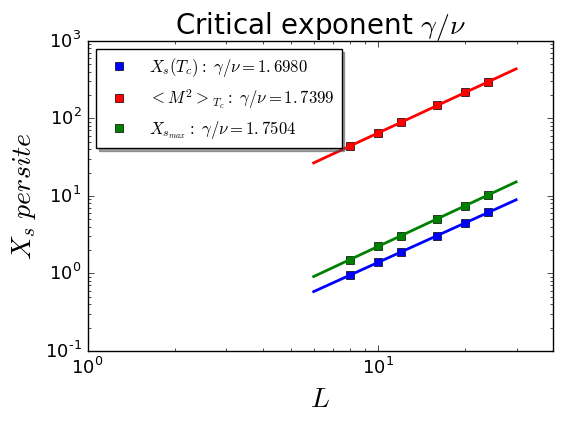

In [220]:
plt.ylabel(r'$X_{s}\ per site$',fontsize=20)
plt.xlabel(r'$L$',fontsize=20)
plt.axis([1, 40, 0.1, 1000])
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.title(r"Critical exponent $\gamma / \nu$",fontsize=20)
#plt.title("Critical Temperature",fontsize=20)
plt.loglog(sizes, Xs_Tc,'bs',linewidth=2.0,label = r'$ X_{s}(T_{c}):\ \gamma/\nu=1.6980 $')
plt.loglog(L,funXs_Tc2,'b',linewidth=2.0)#,label = "fit data")

plt.loglog(sizes, M2_Tc,'rs',linewidth=2.0,label = r'$ < M^{2}>_{T_{c}}:\ \gamma/\nu=1.7399 $')
plt.loglog(L,funM2_Tc,'r',linewidth=2.0)#,label = "fit data")

plt.loglog(sizes, Xs_max,'gs',linewidth=2.0,label = r'$ X_{s_{max}}:\ \gamma/\nu=1.7504 $')
plt.loglog(L,funXs_max,'g',linewidth=2.0)#,label = "fit data")

plt.legend(loc='upper left', shadow=True,numpoints=1)
plt.show()

In [86]:
M_2_prom = []
for i in range(len(sizes)):
    M_2_prom.append(data[i]["M2prom"][intersection[0]]/(sizes[i]*sizes[i]))
print (M_2_prom)
    
X_s = []
for i in range(len(sizes)):
    X_s.append(data[i]["Xs"][intersection[0]]/(sizes[i]*sizes[i]))
print (X_s)

[43.732812500000001, 64.5642, 88.88333333333334, 147.00742187500001, 216.63025000000002, 296.90277777777777]
[0.94341562499999998, 1.3900799999999998, 1.8945277777777778, 3.0800429687500004, 4.4789500000000002, 6.1332986111111119]


In [225]:
popt2, pcov2 =curve_fit(func, sizes, M_2_prom)
popt3, pcov3 =curve_fit(func, sizes, X_s)
frac_g_nu_0 = popt2[1]
frac_g_nu_1 = popt2[1]
gamma_0= frac_g_nu_0*nu
gamma_1= frac_g_nu_1*nu
gamma = (gamma_0+gamma_1)/2
print (popt2,popt3)
print (gamma_0,gamma_1,gamma)
gamma=1.9293

[ 1.1789543   1.73991512] [ 0.02776692  1.69801529]
1.9410713716 1.9410713716 1.9410713716


In [226]:
print (2*beta+gamma)
print (2*nu)

2.21153420909
2.23122535708


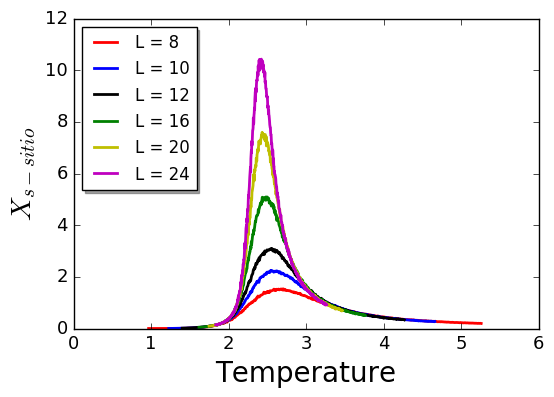

In [227]:
for i in range(len(sizes)):
    #plt.axes(xlim=(2, 3),ylim=(0, 7000))
    plt.ylabel(r'$ X_{s-sitio} $',fontsize=20)
    plt.xlabel('Temperature',fontsize=20)
    plt.tick_params(axis='x', labelsize=13)
    plt.tick_params(axis='y', labelsize=13)
    #plt.title("Critical Temperature",fontsize=20)
    plt.plot(data2[i]["T"],data2[i]["Xs"]/(sizes[i]*sizes[i]), color=colors[i], linewidth=2.0,label="L = {}".format(sizes[i]))
    plt.legend(loc='upper left', shadow=True)
plt.show()


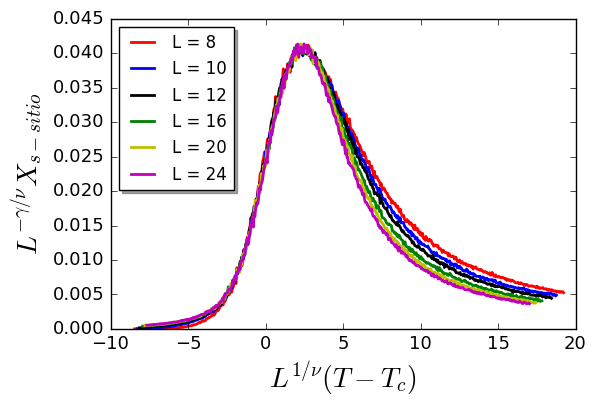

In [228]:
for i in range(len(sizes)):
    plt.ylabel(r'$L^{-\gamma / \nu} X_{s-sitio} $',fontsize=20)
    plt.xlabel(r'$L^{1/\nu}(T-T_c)$',fontsize=20)
    plt.tick_params(axis='x', labelsize=13)
    plt.tick_params(axis='y', labelsize=13)
    #plt.title("Critical Temperature",fontsize=20)
    plt.plot((data2[i]["T"]-data[i]["T"][intersection[0]])*sizes[i]**(1./nu),(data2[i]["Xs"]/(sizes[i]*sizes[i]))*sizes[i]**(-frac_g_nu_0), color=colors[i], linewidth=2.0,label="L = {}".format(sizes[i]))
    plt.legend(loc='upper left', shadow=True)
plt.show()


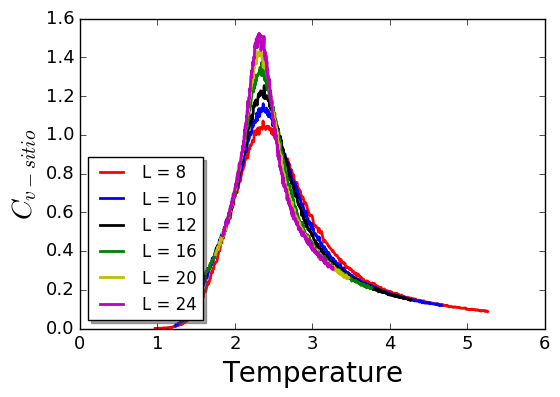

In [229]:
colors = ['r','b','k','g','y','m']

for i in range(len(sizes)):
    plt.ylabel(r'$ C_{v-sitio} $',fontsize=20)
    plt.xlabel('Temperature',fontsize=20)
    plt.tick_params(axis='x', labelsize=13)
    plt.tick_params(axis='y', labelsize=13)
    #plt.title("Critical Temperature",fontsize=20)
    plt.plot(data2[i]["T"],data2[i]["Cv"]/(sizes[i]*sizes[i]), color=colors[i], linewidth=2.0,label="L = {}".format(sizes[i])) # if mean is conserved the plot should be zero
    plt.legend(loc='lower left', shadow=True)
plt.show()